<a href="https://colab.research.google.com/github/hamidrezanorouzi/numericalMethods/blob/main/Lectures/Lecture03_solving_nonLinearEquations_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solving non-linear equations - Part 2**

&nbsp;

Lecturer: **Hamidreza Norouzi**

&nbsp;

### **Notes**❕
This content forms a part of the instructional presentations for the **`numerical methods in chemical engineering`** course designed for undergraduate chemical engineering students at Amirkabir University of Technology.

Feel free to utilize the information and source codes provided in this material, ensuring appropriate acknowledgment of the original document.

The visual elements featured in this document are either original or have been obtained from the following sources, unless specified otherwise:

* Steven C. Chapra, Applied Numerical Methods with Matlab for Engineers and Scientists, 3rd edition, McGraw-Hill (2012).
* Amos Gilat and Vish Subramanian, Numerical Methods for Engineers and Scientists, 3rd edition, Wiley (2014).

<div align="center">
🟥 🟥 🟥
</dive>

---

# 🟡 1) Fixed-point method
* Consider the equation $f(x) = 0$ that we aim to solve. We can reformulate this equation as $x = g(x)$, effectively seeking a point (referred to as the fixed point) for the function g, where $x_{i+1} = g(x_i)$.

* When the absolute difference between $x_{i+1}$ and $x_i$ is smaller than the specified tolerance, $x_{i+1}$ is considered the root of the function f(x).

* The solution is deemed as converged if the estimated error falls below a specified tolerance:
$$
ϵ_a = |\frac{x_{i+1}-x_i}{x_{i+1}}| × 100 \%
$$

### ❓ **Example 1**
Use fixed-point method to find the root of $f(x)=e^{-x}-x$. Take tol = 1%.

<table width="100%">
<tr>
<td width = "65%">

💡 *solution*

We re-arrage the equation $f(x)=0$  to  $x=e^{-x}$, so we have:
$$
x_{i+1}=e^{-x_i}
$$
&nbsp;

and we start with the initial guess $x_0 = 0$. The following table is obtained:

| Iteration  | $x_i$ | $x_{i+1}$  | $ϵ_a$%|
| :---  |    :----:   | :---: | :---: |
|0  | 0.0000 | 1.0000 | 100%|
|1  | 1.0000 | 0.3679 | 171.8%|
|2  | 0.3679 | 0.6922 | 46.85%|
|3  | 0.6922 | 0.5005 | 38.31%|
|4  | 0.5005 | 0.6062 | 17.44%|
|5  | 0.6062 | 0.5454 | 11.15%|
|6  | 0.5454 | 0.5796 | 5.90%|
|7  | 0.5796 | 0.5601 | 3.48%|
|8  | 0.5601 | 0.5711 | 1.93%|
|9  | 0.5711 | 0.5649 | 1.11%|
|10 | 0.5649 | 0.5684 | 0.62%|

The solution is converged after 11 iterations (note that iterations start from 0).
</td>

<td>
<img src="https://drive.google.com/uc?id=1l-wDlbIKOI1Y69i1ZeKeBC6ZSxlIfw4A" width="300">
</td>

</tr>
</table>



## Convergence of fixed-point method

* Depending on the first derivative of $g(x)$, we can judge whether a solution converges or not!
$$
|g^{'}(x)| < 1
$$
* It can be shown that the error for any iteration is linearly proportional to the error from the previous iteration multiplied by the first derivative of $g$:
$$
E_{i+1} = g^{'}(ξ)E_i
$$



<div align="center">
<br>
<img src="https://drive.google.com/uc?id=1CmnA6OfXzfvjHlcywfghQ44S37uZ6gZ1" width="600">
</div>

<div align="center">
🟨 🟨 🟨
</div>


---



# 🟢 2) Newton-Raphson method
* If we assume $x^{*}$ is the root of equation $f(x)=0$ and $x_i$ is the estimate of the root for this equation, we can use Taylor series expansions as follows ($h = x^{*}-x_i$):
$$
f(x^{*}) = f(x_i) + (x^{*}-x_i)f^{'}(x_i) + \frac{(x^{*}-x_i)}{2!}^2f^{"}(x_i) + ... = 0  \tag{2-1}
$$
* Neglecting second and higher order terms, we use this equation to estimate the root:
$$
x^{*} = x_i - \frac{f(x_i)}{f^{'}(x_i)} \tag{2-2}
$$

* Since we used only the linear part, so the estimate may deviate from the actual root $x^{*}$. So, we need to use an iterative procedure to improve it step-by-step.
$$
x_{i+1} = x_i - \frac{f(x_i)}{f^{'}(x_i)} \tag{2-3}
$$
* The following equation is used for checking the convergence:
$$
ϵ_a = |\frac{x_{i+1}-x_i}{x_{i+1}}| × 100 \% \tag{2-4}
$$


### ❓ **Example 2:**
Use Newton-Raphson method to find the root of $f(x)=e^{-x}-x$ with an initial guess of $x_0=0$. Take tol = 0.1%.

💡 *Solution*

The first derivative of $f(x)$ is:
$$
f^{'}(x) = -1-e^{-x}
$$
so the equation for estimating the root becomes:
$$
x_{i+1}=x_i-\frac{e^{-x_i}-x_i}{-1-e^{-x_i}}
$$

| Iteration  | $x_i$ | $x_{i+1}$  | $ϵ_a$%|
| :---  |    :----:   | :---: | :---: |
|0  | 0.00000 | 0.50000 | 100%|
|1  | 0.50000 | 0.56631 | 11.71%|
|2  | 0.56631 | 0.56714 | 0.15%|
|3  | 0.56714 | 0.56714 | 0.00%|

## 2-1) Code for Newton-Raphson method

In [ ]:
def newtonRaphson(fx, dfx, x0, tol=1e-6, maxIter=100):
  """
  Find a root of a function using the Newton-Raphson method.

  :param fx: The function for which to find a root.
  :param dfx: The derivative of the function.
  :param x0: Initial guess for the root.
  :param tol: Tolerance for convergence (default is 1e-6).
  :param maxIter: Maximum number of iterations (default is 100).

  :return: A tuple containing the approximation of the root, the
    absolute function value at the root, and the number of iterations and None
    if no solution is found.
  """
  x = x0
  for iter in range(maxIter):
    f_x = fx(x0)
    f_prime_x = dfx(x0)
    if abs(f_prime_x)<1.0e-15:
      print(f"Derivative is zero at {x}. Newton-Raphson method cannot proceed.")
      return None

    x = x0 - f_x / f_prime_x

    if abs(x) > 1.0e-15:
      ea = abs((x - x0) / x)
    else:
      ea = abs(x)
    x0 = x;
    if abs(f_x) < tol:
      return x, abs(f_x), iter

    if ea < tol:
      return x, ea, iter

  print("Newton-raphson mehtod did not find a solution after "
        f"{maxIter} iterations")
  return None


## 2-2) Playing with the code

### Simple case

In [ ]:
import math
def simpleCase_Fx(x):
  return 8-4.5*(x-math.sin(x))

def simpleCase_dFx(x):
  return -4.5 + 4.5 * math.cos(x)

# test x0 = 2, 4, 0.1 and 0.2
print(newtonRaphson(simpleCase_Fx, simpleCase_dFx, 4) )

(2.43046574172363, 1.3562377887410548e-09, 4)


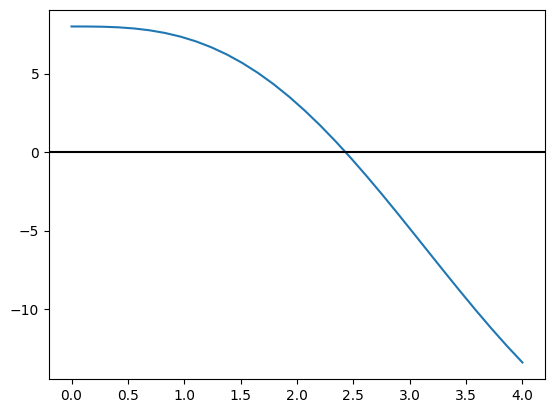

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,4, 30)
y = [simpleCase_Fx(xi) for xi in x]
plt.plot(x,y)
plt.axhline(y=0, c='k')
plt.show()

### Slow convergence case



In [ ]:
def slowConvergence_Fx(x):
  return pow(x,10.0)-1

def slowConvergence_dFx(x):
  return 10*pow(x,9.0)
# test x0 = 0.5 and 1.5
print(newtonRaphson(slowConvergence_Fx, slowConvergence_dFx,2) )

(1.0000000000000009, 1.4004243764631497e-07, 10)


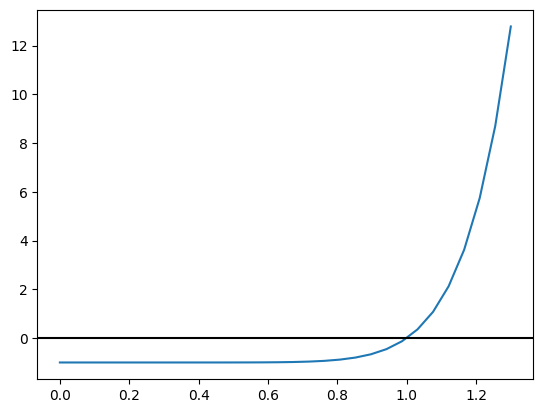

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,1.3, 30)
y = [slowConvergence_Fx(xi) for xi in x]
plt.plot(x,y)
plt.axhline(y=0, c='k')
plt.show()

### Complicated case with multiple roots

Initial guess is 1.0 => (0.8458134067357137, 5.297555916161656e-08, 4)
Initial guess is 2.0 => (1.5707963267948966, 3.858980605295559e-13, 4)
Initial guess is 3.0 => (9.062286500739983, 3.590952343576817e-08, 5)
Initial guess is 4.0 => (4.263590029871862, 8.918745741937073e-10, 6)
Initial guess is 5.0 => (5.16118793089739, 1.0410491591006377e-07, 5)
Initial guess is 6.0 => (6.058785831828935, 5.612201906523713e-07, 3)


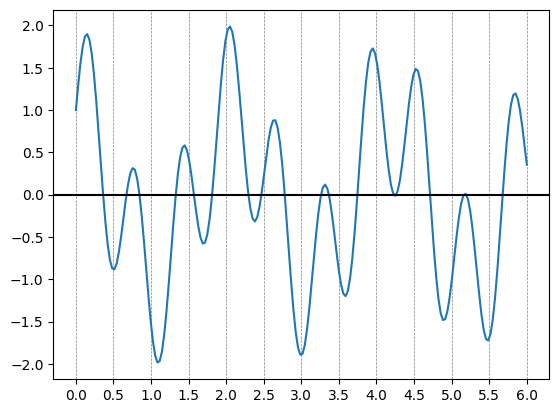

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

def complicated_Fx(x):
  return math.sin(10*x)+math.cos(3*x)

def complicated_dFx(x):
  return 10*math.cos(10*x)-3*math.sin(3*x)

x = np.linspace(0,6, 200)
y = [complicated_Fx(xi) for xi in x]

plt.plot(x,y)
plt.axhline(y=0, c='k')
x_ticks = np.arange(0, 6.01, 0.5)  # Adjust the range as needed

# Apply the custom tick positions to the x-axis
plt.xticks(x_ticks)
plt.grid(True, axis='x', linestyle='--', color='gray', linewidth=0.5)
plt.show()


all_x0 = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
for x0 in all_x0:
  print(
      f"Initial guess is {x0} =>",
      newtonRaphson(complicated_Fx,
                    complicated_dFx,
                    x0) )

## 2-3) Using under-relaxation
* In each iteration of the Newton-Raphson method, we advance toward the solution (hopefully) by $δ$. The value of $\delta$ is obtained by re-arranging Eq. (2-3):
$$
\delta = x_{i+1} - x_i = - \frac{f(x_i)}{f^{'}(x_i)} \tag{2-5}
$$

* Now, the new estimate of the root, $x_{i+1}$, is obtained by:
 $$
 x_{i+1}  = x_i + \alpha \delta \tag{2-6}
 $$

 where $\alpha$ is under-relaxation factor ($0<\alpha ≤ 1$) and it is usually around 0.5.
* The use of under-relaxation makes the solution stable while the rate of convergence becomes slower.


In [ ]:
def newtonRaphsonRelaxed(fx, dfx, x0, alpha = 0.5, tol=1e-6, maxIter=100):
  """
  Find a root of a function using the Newton-Raphson method with
  under-relaxation factor.
  """

  for iter in range(maxIter):
    f_x = fx(x0)
    f_prime_x = dfx(x0)
    if abs(f_prime_x)<1.0e-15:
      print(f"Derivative is zero at {x}. Newton-Raphson method cannot proceed.")
      return None

    delta = - f_x / f_prime_x
    x = x0 + alpha*delta

    if abs(x) > 1.0e-15:
      ea = abs((x - x0) / x)
    else:
      ea = abs(x)

    if abs(f_x) < tol:
      return x, abs(f_x), iter

    if ea < tol:
      return x, ea, iter
    x0 = x

  print("Newton-raphson mehtod did not find a solution after "
        f"{maxIter} iterations")
  return None

Initial guess is 1.0 => (0.84582027390396, 9.02066219690556e-07, 97)
Initial guess is 2.0 => (1.8124727704046386, 9.483263240603725e-07, 88)
Initial guess is 3.0 => (3.7457145757644517, 9.050995310625456e-07, 75)
Initial guess is 4.0 => (4.229031928249209, 9.211901675860596e-07, 97)
Initial guess is 5.0 => (5.1611438646028445, 9.472111875989459e-07, 91)
Initial guess is 6.0 => (6.058733372503755, 9.615461453683276e-07, 69)


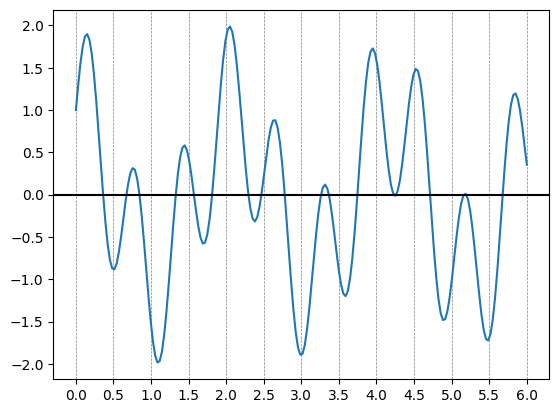

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

def newtonRaphson_Fx(x):
  return math.sin(10*x)+math.cos(3*x)

def newtonRaphson_dFx(x):
  return 10*math.cos(10*x)-3*math.sin(3*x)

x = np.linspace(0,6, 200)
y = [newtonRaphson_Fx(xi) for xi in x]

plt.plot(x,y)
plt.axhline(y=0, c='k')
x_ticks = np.arange(0, 6.01, 0.5)  # Adjust the range as needed

# Apply the custom tick positions to the x-axis
plt.xticks(x_ticks)
plt.grid(True, axis='x', linestyle='--', color='gray', linewidth=0.5)


all_x0 = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
for x0 in all_x0:
  print(
      f"Initial guess is {x0} =>",
      newtonRaphsonRelaxed(newtonRaphson_Fx,
                    newtonRaphson_dFx,
                    x0, 0.1) )

## 2-4) Some examples that newton may diverge
* In these cases, use of under-relaxation may lead to a converged solution.

<table width="100%">
<tr>
<td width = "50%">
<img src="https://drive.google.com/uc?id=1t7hsNCmNdEgOtpffAVFpm3gTe7rrZ1d0" width="94%" >
</td>
<td>
<img src="https://drive.google.com/uc?id=17sB4r7DmUGmU1d0sdjYLcEcQl_PRAsux" width="97%" >
</td>

</tr>
</table>





## 2-5) Properties of Newton-Raphson method
* The convergence is very rapid and error is reduced very quickly.
$$
E_{i+1} = \frac{-f^{"}(x)}{2f^{'}(x)}E^{2}_{i}
$$
* It may diverge if the initial guess is not close to the root.

<div align="center">
🟩 🟩 🟩
</div>


---



# 🔵 3) Secant method
* A potential problem in implementing the Newton-Raphson method is the evaluation of the derivative.
* One solution is to use finite-difference method to calculate the first derivative of the function:
$$
f^{'}(x_i) ≃ \frac{f(x_i+\Delta x)-f(x_i)}{\Delta x} \tag{3-1}
$$
* Considering Eq. (2-3) and substituting Eq. (3-1) in it, we obtain:
$$
x_{i+1} = x_i - \frac{f(x_i) Δx}{f(x_i+\Delta x)-f(x_i)}  \tag{3-2}
$$



### ❓ **Example 3:**
Use secant method to find the root of $f(x)=e^{-x}-x$ with an initial guess of $x_0=0$. Take tol = 0.1%.

💡 *Solution*

We use Eq. (3-2) to find the root and take $\delta$=0.001.

| Iteration  | $x_i$ | $x_{i+1}$  | $ϵ_a$%|
| :---  |    :----:   | :---: | :---: |
| 0  | 0.00000 | 0.50013| 100 %|
| 1  | 0.50013 | 0.56633| 11.69%|
| 2  | 0.56633 | 0.56714| 0.14% |
| 3  | 0.56714 | 0.56714| 0.00% |



## 3-1) Code for secant method

In [ ]:
def secantRelaxed(fx, x0, alpha = 0.5, tol=1e-6, maxIter=100):
  """
  Find a root of a function using the secant method with
  under-relaxation factor.

  :param fx: The function for which to find a root.
  :param x0: Initial guess for the root.
  :param alpha: Under-relaxation factor (default is 0.5)
  :param tol: Tolerance for convergence (default is 1e-6).
  :param maxIter: Maximum number of iterations (default is 100).

  :return: A tuple containing the approximation of the root, the
    absolute function value at the root, and the number of iterations and None
    if no solution is found.
  """
  delta_x = 0.001;
  for iter in range(maxIter):

    f_x = fx(x0)
    f_delta_x = fx(x0+delta_x)

    if abs(f_x - f_delta_x)<1.0e-15:
      print(f"Derivative is zero at {x}. Secant method cannot proceed.")
      return None

    delta = - f_x * delta_x /(f_delta_x - f_x)
    x = x0 + alpha*delta

    if abs(x) > 1.0e-15:
      ea = abs((x - x0) / x)
    else:
      ea = abs(x)

    if abs(f_x) < tol:
      return x, abs(f_x), iter

    if ea < tol:
      return x, ea, iter
    x0 = x

  print("Secant mehtod did not find a solution after "
        f"{maxIter} iterations")
  return None

In [ ]:
import math

def secant_Fx(x):
  return 8-4.5*(x-math.sin(x))

print(secantRelaxed(secant_Fx, 4, 1) )

(2.430465741724792, 4.952367937960389e-08, 4)


<div align="center">
🟦 🟦 🟦
</div>

# 🟢 4) System of non-linear equations

* Consider a set of two non-linear equations:
$$
f_1(x_1,x_2)=0 \\
f_2(x_1,x_2)=0   \tag{5-1}
$$

&nbsp;

* Taylor expansions series of these functions around $(x_{1,i},x_{2,i})$ are:

&nbsp;

$$
f_1(x_{1,i+1},x_{2,i+1}) = f_1(x_{1,i},x_{2,i}) + \frac{\partial f_1}{\partial x_1}\Bigg|_{x_{1,i},x_{2,i}}(\delta_1) + \frac{\partial f_1}{\partial x_2}\Bigg|_{x_{1,i},x_{2,i}}(\delta_2) + . . . = 0 \\
f_2(x_{1,i+1},x_{2,i+1}) = f_2(x_{1,i},x_{2,i}) + \frac{\partial f_2}{\partial x_1}\Bigg|_{x_{1,i},x_{2,i}}(\delta_1) + \frac{\partial f_2}{\partial x_2}\Bigg|_{x_{1,i},x_{2,i}}(\delta_2) + . . . =0  \tag{5-2}
$$

* Keeping the linear part and neglecting the higher order terms results:

$$
 \frac{\partial f_1}{\partial x_1}\Bigg|_{x_{1,i},x_{2,i}}(\delta_1) + \frac{\partial f_1}{\partial y_1}\Bigg|_{x_{1,i},x_{2,i}}(\delta_2) = -f_1(x_{1,i},x_{2,i}) \\
 \frac{\partial f_2}{\partial x_1}\Bigg|_{x_{1,i},x_{2,i}}(\delta_1) + \frac{\partial f_2}{\partial y_1}\Bigg|_{x_{1,i},x_{2,i}}(\delta_2) = -f_2(x_{1,i},x_{2,i})  \tag{5-3}
$$
$$
\delta_1 = x_{1,i+1} - x_{1,i} \\
\delta_2 = x_{2,i+1} - x_{2,i}  \tag{5-4}
$$

* The above equations form a system of linear equations:

$$ \begin{bmatrix}
\frac{\partial f_1}{\partial x_1}\Bigg|_{x_{1,i},x_{2,i}} & \frac{\partial f_1}{\partial x_2}\Bigg|_{x_{1,i},x_{2,i}}  \\
\frac{\partial f_2}{\partial x_1}\Bigg|_{x_{1,i},x_{2,i}} & \frac{\partial f_2}{\partial x_2}\Bigg|_{x_{1,i},x_{2,i}}  \\
\end{bmatrix}
\begin{bmatrix} \delta_1 \\ \delta_2 \end{bmatrix} = -
\begin{bmatrix} f_1(x_{1,i},x_{2,i}) \\ f_2(x_{1,i},x_{2,i}) \end{bmatrix} \tag{5-5}
$$

&nbsp;
* In compact form we have:
$$
[J]\{\delta\} = - \{f\}  \tag{5-6}
$$
 where $[J]$ is called **Jacobina matrix**.



* In each iteration the solution of the above system gives $(\delta_1, \delta_2)$.
* We can use under-relaxation factor ($\alpha$) to stabilize the solution:
$$
x_{1,i+1} =  x_{1,i} + \alpha \delta_1 \\
x_{2,i+1} =  x_{2,i} + \alpha \delta_2  \tag{5-7}
$$
 where $0 < \alpha ≤ 0$, with typical value of 0.5.

### ❓ **Example 4**
Use Newton's method to solve the system of non-linear equations:


💡 *Solution*



## 4-1) Code for Newton's method

* Instead of providing the Jacobian matrix, the code calculates it using a technique called perturbation (similar to what we did in secant method).
* In this way, we need to provide the system of equations only (not the Jacobina matrix).

In [ ]:
import numpy as np

# Define a function to approximate the Jacobian matrix using finite differences
def approximateJacobian(func, x, epsilon=1e-5):
  n = len(x)
  J = np.zeros((n, n))

  for i in range(n):
    x_perturbed = x.copy()
    x_perturbed[i] += epsilon
    delta_f = func(x_perturbed) - func(x)
    J[:, i] = delta_f / epsilon

  return J

# Define the main function
def newtonsSet(equations, initial_guess, alpha=0.5, tolerance=1e-6, maxIterations=100):
  """
  Solves a system of nonlinear equations using the Newton-Raphson method.

  Parameters:
    - equations : A function that represents a system of equations to be solved.
    - initial_guess (list or ndarray): The initial guess for the solution.
    - alpha (float, optional): under-relaxation factor (default is 0.5).
    - tolerance (float, optional): The convergence tolerance (default is 1e-6).
    - maxIterations (int, optional): (default is 100)

  Returns:
    - x0 (ndarray): The approximate solution to the system of equations.
    - None: if no solution is obtained.
  """

  x0 = np.array(initial_guess)

  for iteration in range(maxIterations):
    # Calculate the system values and approximate Jacobian at the current point
    f_values = equations(x0)
    J = approximateJacobian(equations, x0)

    # Solve the linear system J * delta_x = -f_values for delta_x
    delta_x = np.linalg.solve(J, -f_values)

    # Update the solution
    x0 += alpha * delta_x

    # Check for convergence
    if np.linalg.norm(delta_x) < tolerance:
      return x0

  print("Newton-Raphson did not converge")
  return None

In [ ]:
def equations(xs):
  x , y = xs;
  f1 = y - 0.5*(np.exp(x/2)+np.exp(-x/2))
  f2 =  9*x*x + 25*y*y -225
  return np.array([f1, f2])


initial_guess = [1.0, 1.0]
result = newtonsSet(equations, initial_guess)
print(result)

[3.03115576 2.38586552]


# 🟣 5) Using libraries for solving non-linear equations


In [ ]:
import numpy as np
from scipy.optimize import fsolve

def func(xs):
  x , y = xs;
  return [y - 0.5*(np.exp(x/2)+np.exp(-x/2)),
        9*x*x + 25*y*y -225]

root = fsolve(func, [2.5, 2.0])
print ("The solution of the set is ", root )
np.isclose(func(root), [0.0, 0.0])  # func(root) should be almost 0.0.


The solution of the set is  [3.03115539 2.38586565]


array([ True,  True])

In [ ]:
def calculate_lnO_sf(Ta):
  global oxygenConentration
  term1 = -139.34411
  term2 = (1.575701e5) / Ta
  term3 = (6.642308e7) / (Ta**2)
  term4 = (1.243800e10) / (Ta**3)
  term5 = (8.621949e11) / (Ta**4)

  return term1 + term2 - term3 + term4 - term5 - math.log(oxygenConentration)

oxygenConentration = 10

secantRelaxed(calculate_lnO_sf, 300 )

(288.5383569509035, 5.058195901766657e-07, 15)

<div align="center">
🟪 🟪 🟪
</div>


---

